# Exploratory Data Analysis

DONE BY : ASWATH S

DATASET : SAMPLESUPERSTORE.CSV (https://bit.ly/3i4rbWl)

**#GRIPAUGUST21    DATASCIENCE AND BUSINESS ANALYTICS INTERNSHIP/   TASK 3
THE SPARKS FIUNDATIONS (https://internship.thesparksfoundation.info/)**  

## Objective
   1.  Find the weak areas where the business manager can work to make more profit.
   2.  Find the solutions to business problem 
/-/

## 1.Importing the Libraries

In [1]:
import pandas as pd   # for data manipulation and analysis
import numpy as np    # for statistical analysis
# for visualization
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as py
import seaborn as sns
sns.set(style="white")

### Fetching the data

In [2]:
data=pd.read_csv("SampleSuperstore.csv")    #To store the dataset
data.head()                                 #Show the first 5 elements in the dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Lets check the data before analysis

In [3]:
data.info()   #to print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Checking the null values and duplicate values in the dataset through isnull() and  function

In [4]:
print("Null values",data.isnull().sum())   # to check the null values in the dataset
data.isnull().sum()
print("Duplicates values")
data.duplicated().sum()                     # to check the duplicate values in the dataset

Null values Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Duplicates values


17

#### The above dataset has no empty(null) but has duplicate values which can be rectified using drop duplicate function

In [5]:
data1=data.drop_duplicates()      #to remove the duplicates.

#### Now I have removed the duplicate datas and Lets check the number of rows and columns using the shape()

In [6]:
print("The rows and column of new dataset is ",data1.shape)
print("The rows and column of old dataset is ",data.shape)

The rows and column of new dataset is  (9977, 13)
The rows and column of old dataset is  (9994, 13)


### Descriptive analysis of the data

##### The analysis takes place with the new clean dataset

In [7]:
data1.describe()          # to give the statistical data

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# 2. Visualising correlation

###  Pearson Correlation, Tabular

In [8]:
data1.corr(method = 'pearson')  #correlation analysis

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


### heatmap

<AxesSubplot:>

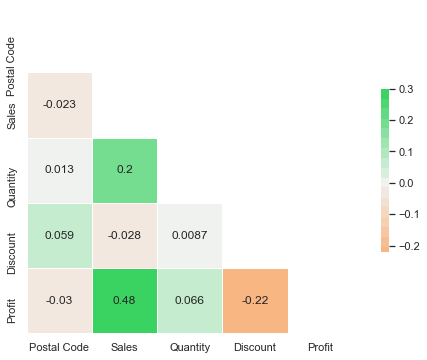

In [9]:


data1corrmap = data1.corr() # data of correlation

mask = np.triu(np.ones_like(data1corrmap, dtype=bool))  # to isolate the upper triangle of a matrix while turning all the values in the lower triangle into 0
f, ax = py.subplots(figsize=(10, 6))                    # Set up the matplotlib figure
cmap = sns.diverging_palette(38, 133, s=90, l=75, n=19) # Generate a custom diverging colormap
sns.heatmap(data1corrmap, mask=mask,annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw the heatmap with the mask and correct aspect ratio

 From the above visualization, we can understand, the discount is negatively correlated to the sales and Profit

  Sales and Profit are positively correlated

### Plotting graph with respect to the category


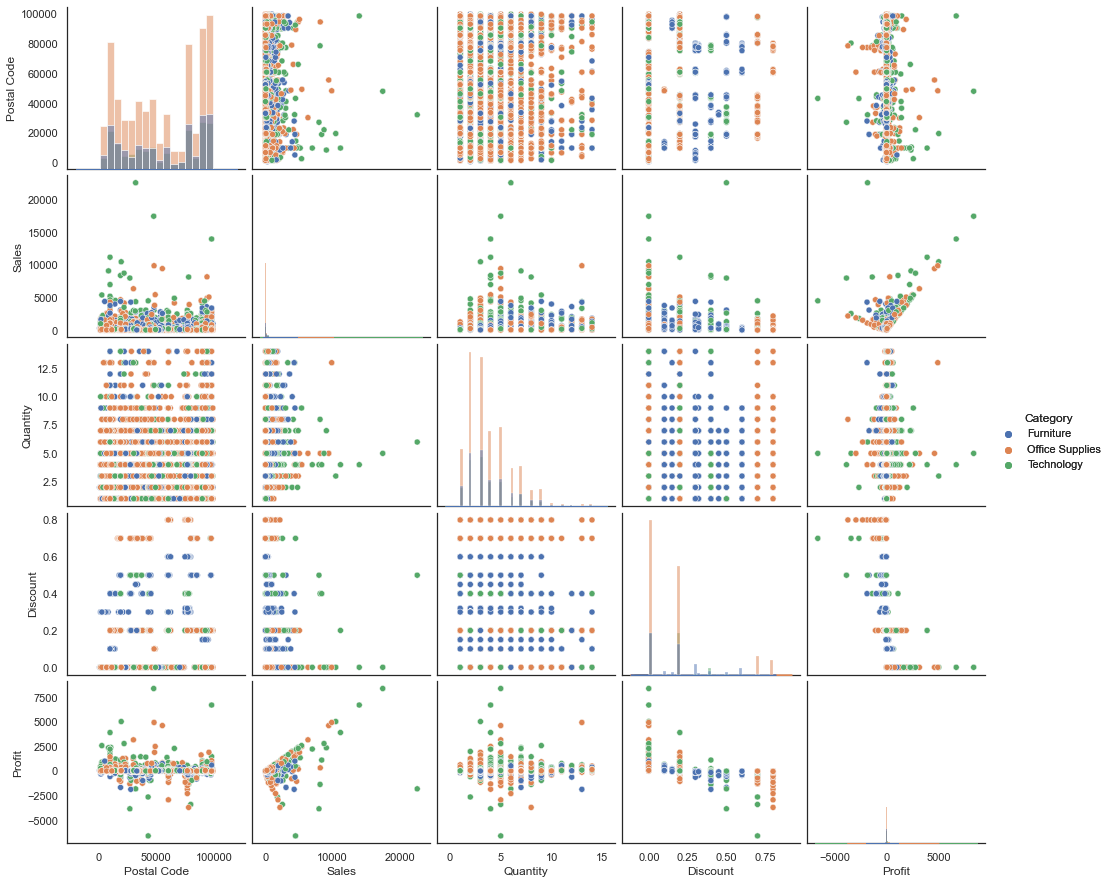

In [10]:
dataplot=sns.pairplot(data1, hue='Category')  #pairplot- pair wise relationship between the data, w.r.t Category
dataplot.map_diag(sns.histplot)               #At diagonal
dataplot.map_offdiag(sns.scatterplot)         # Scatterplot other than diagonal
dataplot.add_legend()                         # Plot detail, description for identication
py.show()

# 3. Univariant analysis

No handles with labels found to put in legend.


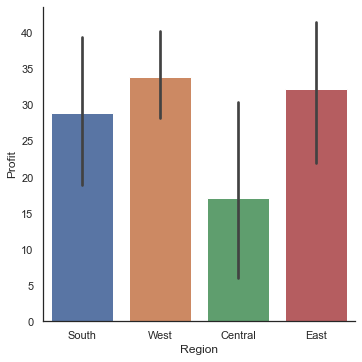

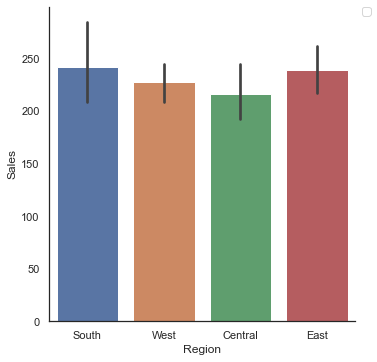

In [11]:
regionwithprofit=sns.catplot(x="Region", y="Profit", kind="bar", data=data1)
regionwithsale=sns.catplot(x="Region", y="Sales", kind="bar", data=data1)

py.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
py.show()

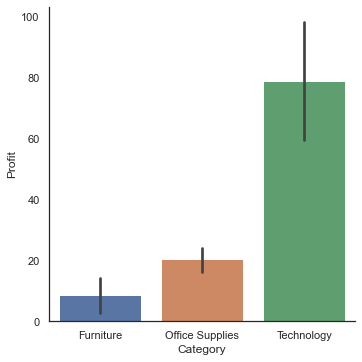

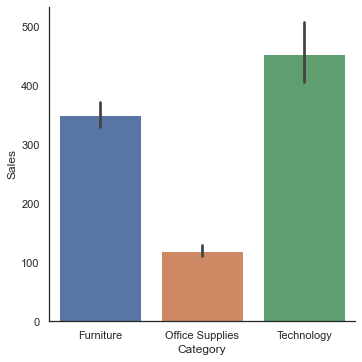

In [12]:
categorywithprofit=sns.catplot(x="Category", y="Profit", kind="bar", data=data1)
categorywithsale=sns.catplot(x="Category", y="Sales", kind="bar", data=data1)

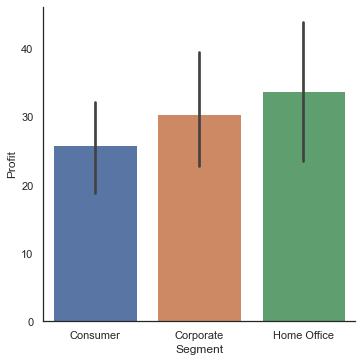

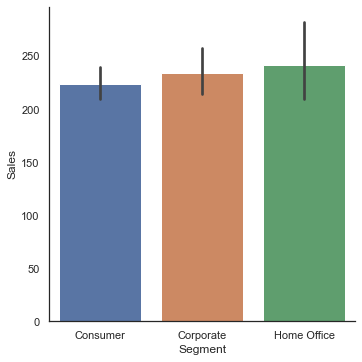

In [13]:
segmentwithprofit=sns.catplot(x="Segment", y="Profit", kind="bar", data=data1)
segmentwithsales=sns.catplot(x="Segment", y="Sales", kind="bar", data=data1)

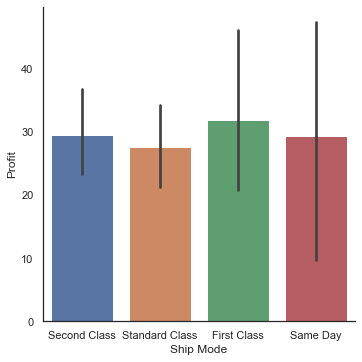

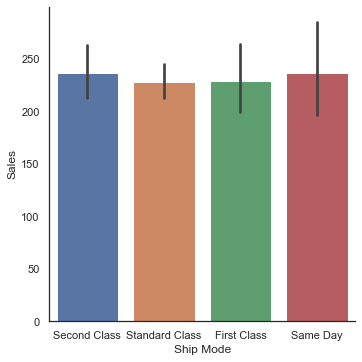

In [14]:
shipmodewithprofit=sns.catplot(x="Ship Mode", y="Profit", kind="bar", data=data1)
shipmodewithsales=sns.catplot(x="Ship Mode", y="Sales", kind="bar", data=data1)

The Category and Region datas has less profit with respect to sales in the dataset

# Bivariant analysis

## Checking the Profit and Sales with respect to the region and Category

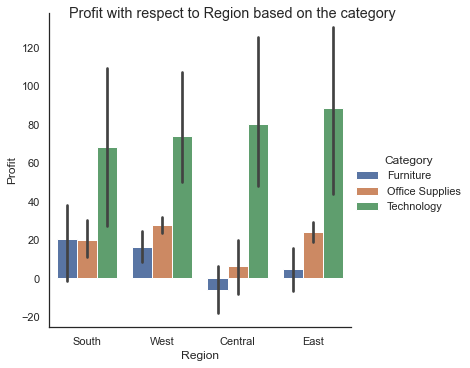

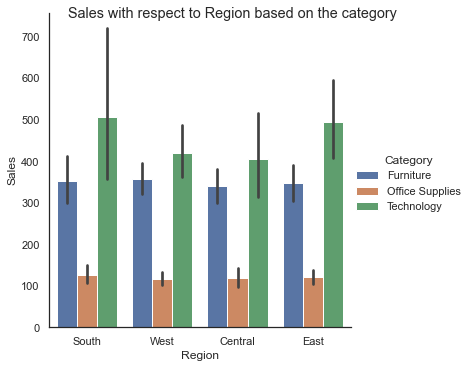

In [15]:
#Profit in each Category with respect to the each Region
regionwithcategoryprofit = sns.catplot(x="Region", y="Profit", hue="Category", kind="bar", data=data1)
regionwithcategoryprofit.fig.suptitle("Profit with respect to Region based on the category\n")

#Sales in each Category with respect to the each Region
regionwithcategorysales = sns.catplot(x="Region", y="Sales", hue="Category", kind="bar", data=data1)
regionwithcategorysales.fig.suptitle("Sales with respect to Region based on the category\n")

py.show()

Text(0.5, 0.98, 'Quantity with respect to Region based on the category\n')

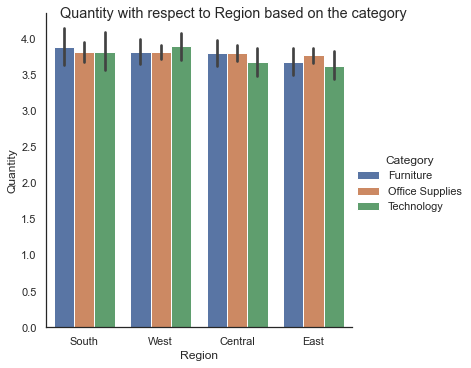

In [16]:
#Quantities in each Category with respect to the each Region

regionwithcategoryquantities = sns.catplot(x="Region", y="Quantity", hue="Category", kind="bar", data=data1)
regionwithcategoryquantities.fig.suptitle("Quantity with respect to Region based on the category\n")


From the above data, 
   The Furniture Category has loss. 
   The Central Region has loss.
   The Sales is four times of profit (Quantity data).

## Analysis of the Furniture Category

In [17]:
sm1=data1.loc[data1.Category=="Furniture"]
sm1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092


<AxesSubplot:>

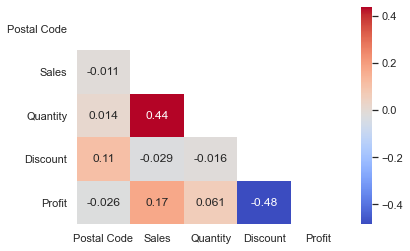

In [18]:
mask = np.triu(np.ones_like(data1corrmap, dtype=bool))
sns.heatmap(sm1.corr(), mask=mask,annot=True, cmap ="coolwarm")

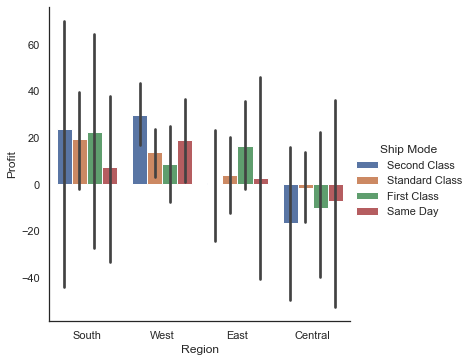

In [19]:
sns.catplot(data = sm1, x = "Region",y = "Profit" ,hue = "Ship Mode", kind="bar")

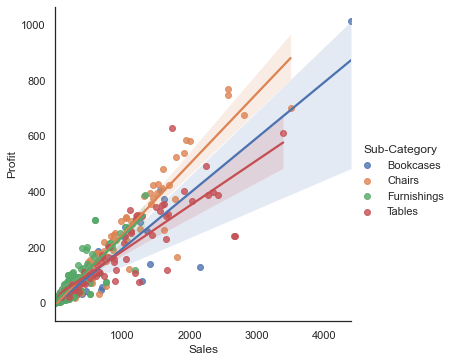

In [20]:
sm10 = sm1[sm1["Discount"]==0]
sns.lmplot(x="Sales", y="Profit", hue="Sub-Category", data=sm10)

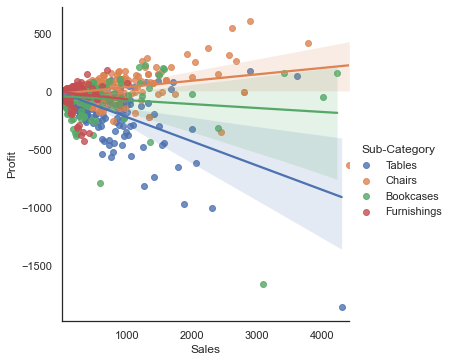

In [21]:
sm11 = sm1[sm1["Discount"]!=0]
sns.lmplot(x="Sales", y="Profit", hue="Sub-Category", data=sm11)

The Business Manager should look over the Furniture Category, where the Discount on the Furniture especially on Table, lead the business to loss.

## Analysis of the Central Region

In [22]:
cr=data1.loc[data1.Region=="Central"]
cr.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711,Central,Office Supplies,Storage,665.880,6,0.0,13.3176
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884


<AxesSubplot:>

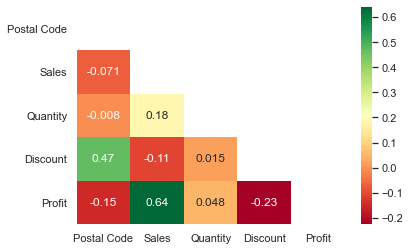

In [23]:
mask = np.triu(np.ones_like(data1corrmap, dtype=bool))
sns.heatmap(cr.corr(), mask=mask,annot=True, cmap ="RdYlGn")

### From the above Heatmap of Central Region, we can understand that the Discount makes the loss.
### Most of the region gets the Discount ( Corr(Postal Code and Discount) = positive )

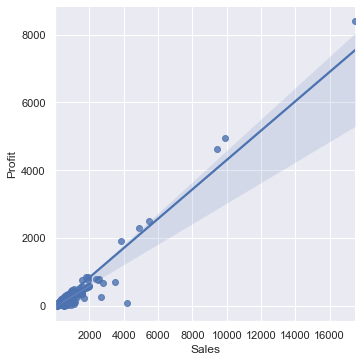

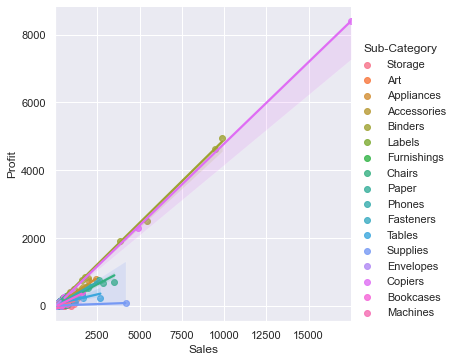

In [24]:

cr0 = cr[cr["Discount"]==0]
sns.set(rc = {'figure.figsize':(3,2)})
sns.lmplot(x="Sales", y="Profit", data=cr0)
sns.lmplot(x="Sales", y="Profit", hue="Sub-Category", data=cr0)


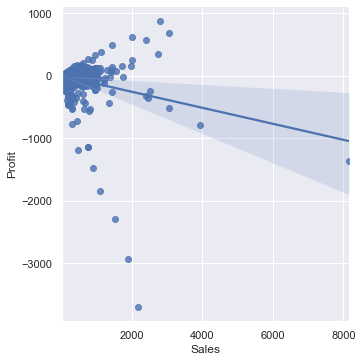

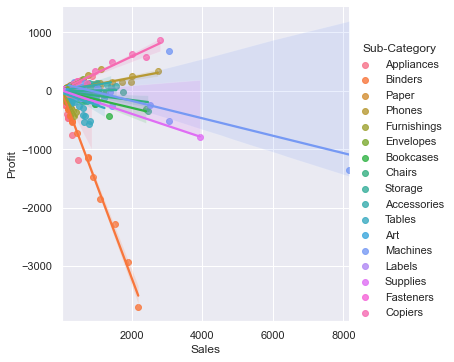

In [25]:
cr1 = cr[cr["Discount"]!=0]
sns.lmplot(x="Sales", y="Profit", data=cr1)
sns.lmplot(x="Sales", y="Profit", hue="Sub-Category", data=cr1)

<ipython-input-26-0d3149548c62>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels(a.get_yticks(), size = 20)


[Text(0, -100.0, '-100.0'),
 Text(0, -50.0, '-50.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 50.0, '50.0'),
 Text(0, 100.0, '100.0'),
 Text(0, 150.0, '150.0'),
 Text(0, 200.0, '200.0'),
 Text(0, 250.0, '250.0'),
 Text(0, 300.0, '300.0')]

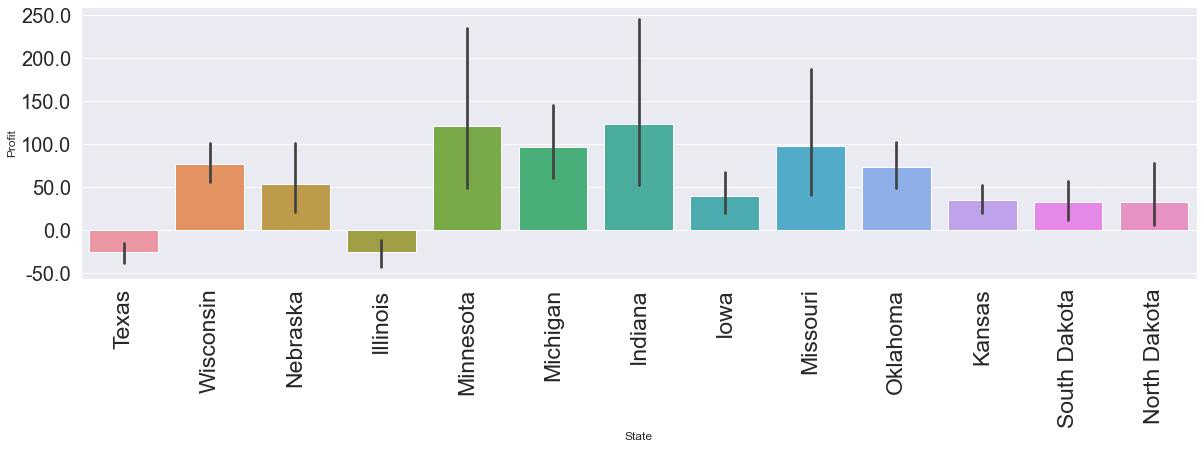

In [26]:
py.figure(figsize=(20,5))
a=sns.barplot(x="State",y="Profit",data=cr)  #states profit in central region
py.xticks(fontsize=23,rotation=90)

a.set_yticklabels(a.get_yticks(), size = 20)

#### In Central Region the Discount causes the loss, which is proved by the above graphs.

### Hence we have proved that most of the consumers get the discount in central region, so there is least profit in that sector and region

## Segment based *classification*

<Figure size 5040x360 with 0 Axes>

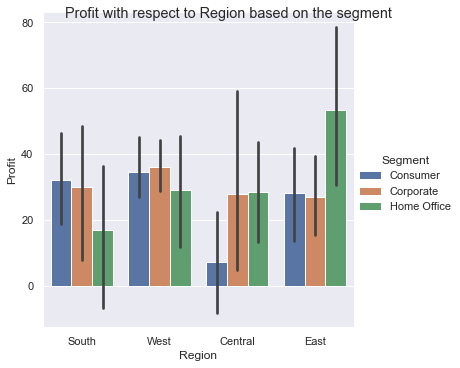

In [27]:
py.figure(figsize=(70,5))
#Profit in different Segment with respect to the Region
regionwithsegment = sns.catplot(x="Region", y="Profit", hue="Segment", kind="bar", data=data1)
regionwithsegment.fig.suptitle("Profit with respect to Region based on the segment\n")

py.show()



Text(0.5, 0.98, 'Profit with respect to Segment based on the category\n')

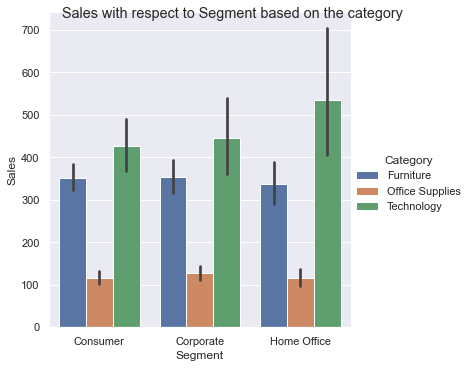

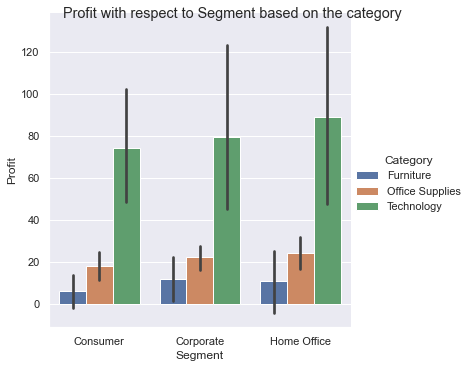

In [28]:
#Sales in different Segment with respect to the Category
segmentwithcategorysales = sns.catplot(x="Segment", y="Sales", hue="Category", kind="bar", data=data1)
segmentwithcategorysales.fig.suptitle("Sales with respect to Segment based on the category\n")

#Profit in different Segment with respect to the Category
segmentwithcategoryprofit = sns.catplot(x="Segment", y="Profit", hue="Category", kind="bar", data=data1)
segmentwithcategoryprofit.fig.suptitle("Profit with respect to Segment based on the category\n")


Text(0.5, 0.98, 'Profit with respect to Segment based on the Ship Mode\n')

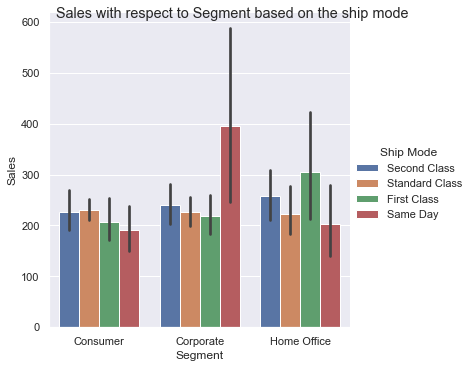

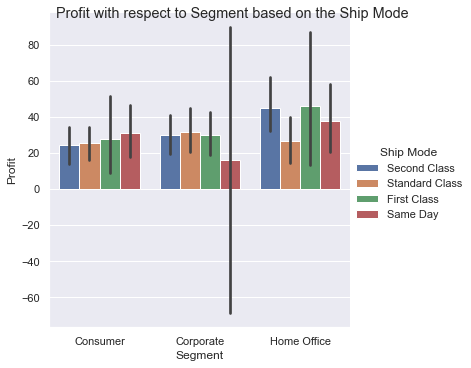

In [29]:
#Sales in different Segment with respect to the Category
segmentwithshipmodesales = sns.catplot(x="Segment", y="Sales", hue="Ship Mode", kind="bar", data=data1)
segmentwithshipmodesales.fig.suptitle("Sales with respect to Segment based on the ship mode\n")

#Profit in different Segment with respect to the Category
segmentwithshipmodeprofit = sns.catplot(x="Segment", y="Profit", hue="Ship Mode", kind="bar", data=data1)
segmentwithshipmodeprofit.fig.suptitle("Profit with respect to Segment based on the Ship Mode\n")



From the above analysis,Comparing with other sales and profit
 1.   there is profit,if the consumer choose the same day delivery, eventhough there is less sale.
 2.   There is loss in the corporate segment in case of same day delivery, eventhough there is high sale.



 

## Analysis of State

In [30]:
ds=data1.groupby(['State']).sum()
sds=ds.sort_values(by=['Profit'], ascending=False)
ds.head()
sds.head()

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
California,183916115,457576.2715,7649,145.6,76330.7891
New York,11825710,310827.1510,4220,62.4,74015.4622
Washington,49269259,138560.8100,1871,32.4,33368.2375
Michigan,12307876,75879.6440,943,1.8,24428.0903
Virginia,5124335,70636.7200,893,0.0,18597.9504


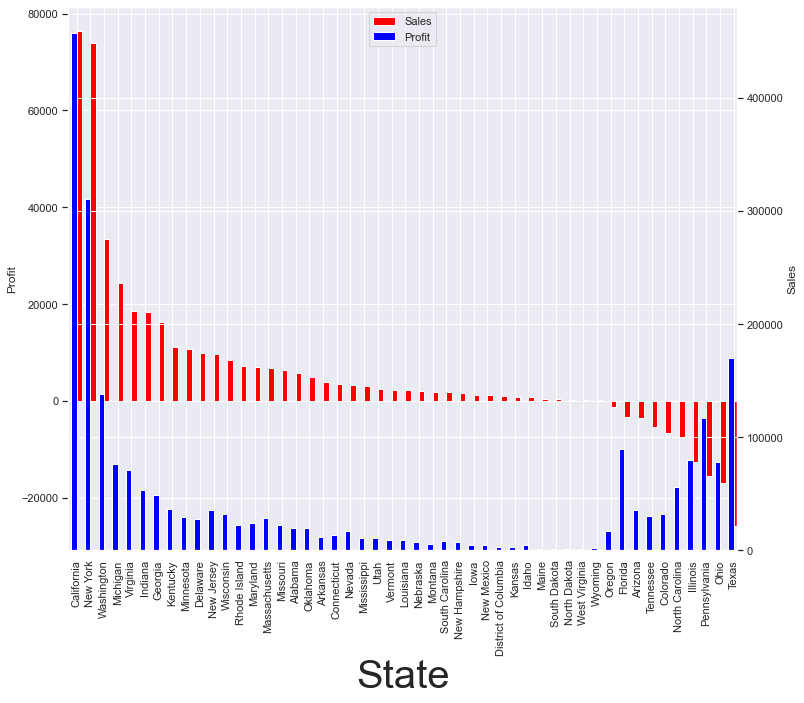

In [31]:
from matplotlib.figure import Figure
import pylab as pl
fig = pl.figure(figsize=(12, 10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

sds.Profit.plot(kind='bar', color='red', ax=ax, width=width, position=0, label='Sales')
sds.Sales.plot(kind='bar', color='blue', ax=ax2, width=width, position=1, label='Profit')

ax.set_ylabel('Profit')
ax2.set_ylabel('Sales')
ax. xaxis. label. set_size(40)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper center')


pl.show()

<ipython-input-34-2d12b2e19605>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2=data1.groupby(['State'], as_index=False)['Profit','Sales','Quantity','Region'].sum()
<ipython-input-34-2d12b2e19605>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_yticklabels(b.get_yticks(), size = 30)


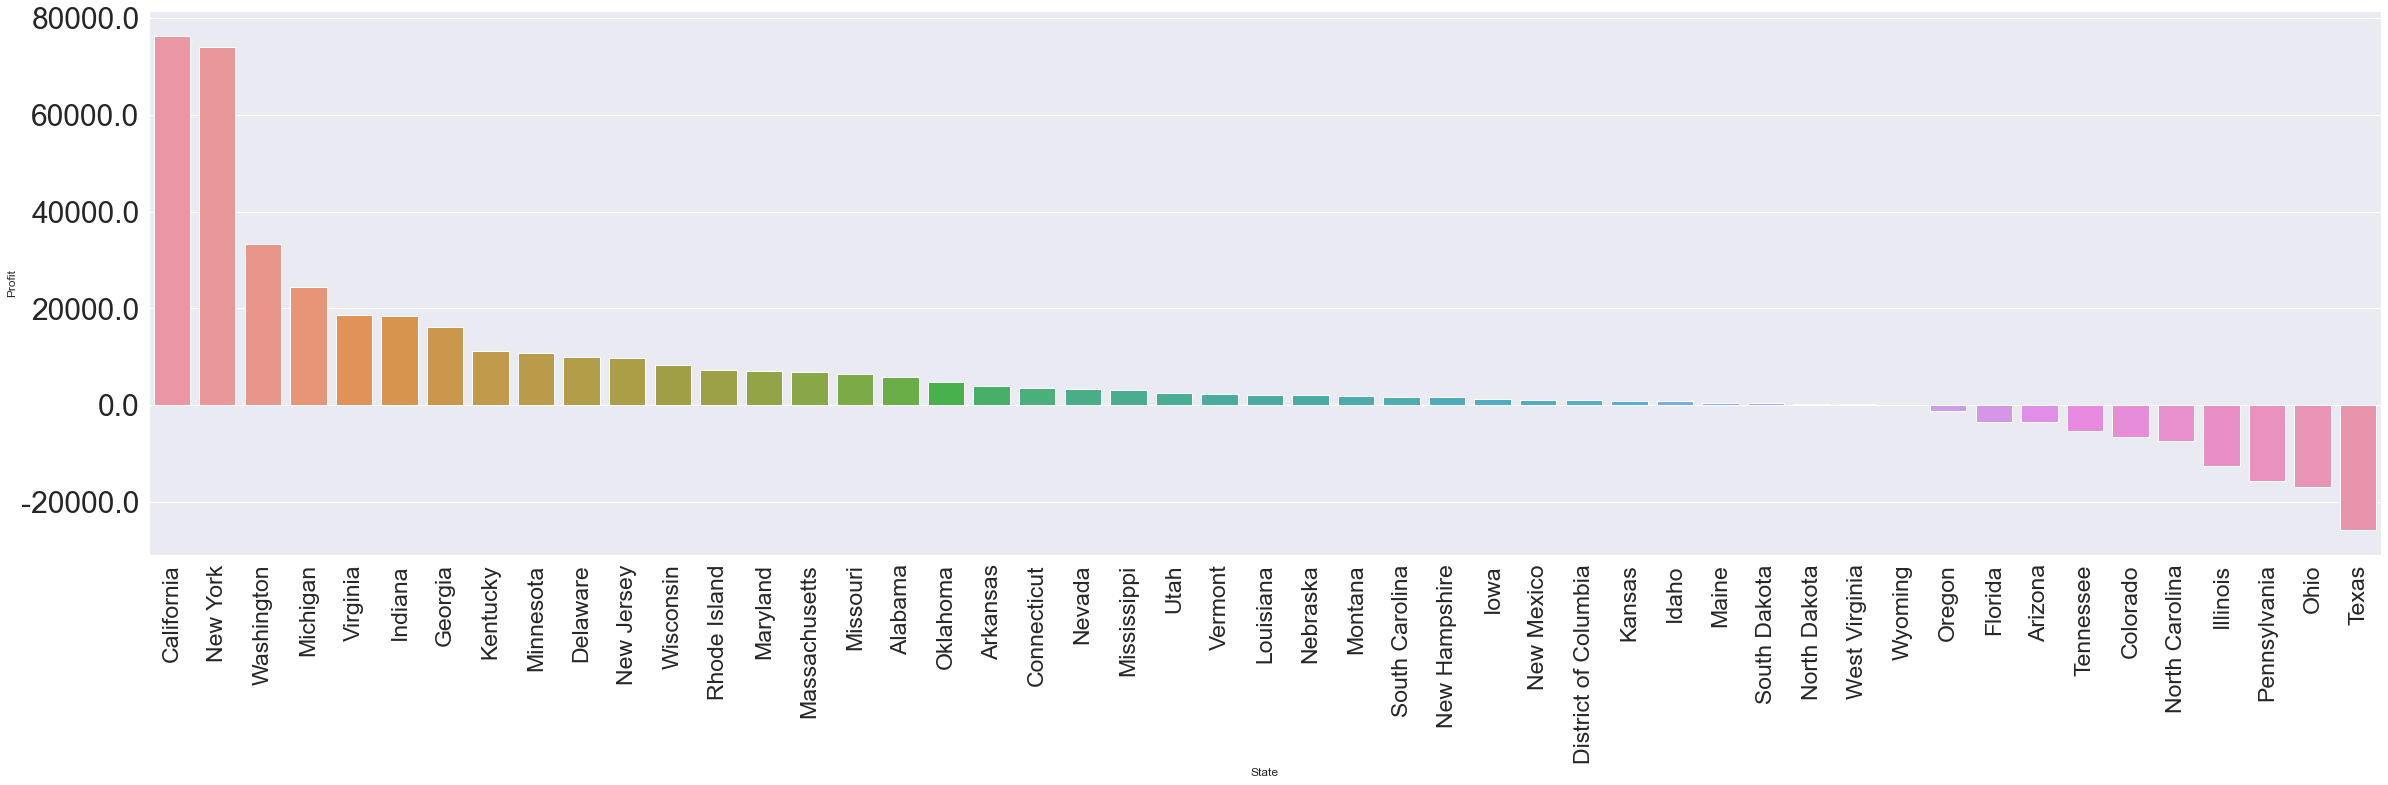

In [34]:

data2=data1.groupby(['State'], as_index=False)['Profit','Sales','Quantity','Region'].sum()
data3=data2.sort_values(by='Profit',ascending=False)
b=sns.barplot(x="State",y="Profit",data=data3)
sns.set(rc={'figure.figsize':(40,10)})

py.xticks(fontsize=23,rotation=90)
b.set_yticklabels(b.get_yticks(), size = 30)
py.show()




The Top 5 profit States are:

In [35]:
data3.head()['State']    #.head() - to view first five records in the document, ["State"]- elements of the particular column

3     California
30      New York
45    Washington
20      Michigan
44      Virginia
Name: State, dtype: object

The Top 5 least profit states are:

In [36]:
data3.tail()["State"]  #.tail() - to view last five records in the document, ["State"]- elements of the particular column

31    North Carolina
11          Illinois
36      Pennsylvania
33              Ohio
41             Texas
Name: State, dtype: object

From the above table we can conclude that the Texas is in the LOSS, even though there is more sales.

# Summary

1.   Discount is main reason for the reduction of Profit.
2.   Sales and Profit are positively correlated.
3.   Furniture Category is the least profit due to discount, the most affected one is Tables.
4.    Central Region is the least profit region to the company due to **Discount**.
5.    Technology Category is the most saled and more profitted Category
6.     There is profit,if the consumer choose the same day delivery, eventhough there is less sale.
7.     There is loss in the corporate segment in case of same day delivery, eventhough there is high sale
8.     The highly profitted States are
            *    California (Most Profitted State)
            *    New York
            *    Washington
            *    Michigan
            *    Virginia 
            
9.      The highly lost States are 
            *     North Carolina
            *     Illinois
            *     Pennsylvania
            *     Ohio
            *     Texas (Most Lostted State) 
10.     The main contributing state in Central Region for the loss is Texas and Illinois, So concentrate on the two states.







